In [1]:
import webbrowser

# Dataset
url = "https://archive.ics.uci.edu/dataset/73/mushroom"

# Open
webbrowser.open(url)

True

In [ ]:
!pip install -r requirements.txt

In [2]:
# Analiza
import pandas as pd
import numpy as np
import re

# Wizualizacja
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Analiza statystyczna
from scipy import stats
from scipy.stats import skew, kurtosis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Modelowanie i trasformacje
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import fbeta_score, confusion_matrix, ConfusionMatrixDisplay

# PyCaret
from pycaret.classification import setup, compare_models, add_metric, ClassificationExperiment

# Interpretacja
import shap

In [3]:
dt = pd.read_csv("agaricus-lepiota.data", header=None)

In [4]:
dt

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [5]:
# Przypisanie polskich nazw kolumn
column_names = [
    'trujący',             # poisonous
    'kształt-kapelusza',   # cap-shape
    'powierzchnia-kapelusza',  # cap-surface
    'kolor-kapelusza',     # cap-color
    'siniaki',             # bruises
    'zapach',              # odor
    'przyczep-blaszek',    # gill-attachment
    'rozstaw-blaszek',     # gill-spacing
    'rozmiar-blaszek',     # gill-size
    'kolor-blaszek',       # gill-color
    'kształt-trzonu',      # stalk-shape
    'korzeń-trzonu',       # stalk-root
    'powierzchnia-trzonu-nad-pierścieniem',  # stalk-surface-above-ring
    'powierzchnia-trzonu-pod-pierścieniem',  # stalk-surface-below-ring
    'kolor-trzonu-nad-pierścieniem',  # stalk-color-above-ring
    'kolor-trzonu-pod-pierścieniem',  # stalk-color-below-ring
    'typ-zasłony',         # veil-type
    'kolor-zasłony',       # veil-color
    'liczba-pierścieni',   # ring-number
    'typ-pierścienia',     # ring-type
    'kolor-wydruku-zarodników',  # spore-print-color
    'populacja',           # population
    'siedlisko'            # habitat
]

# Przypisanie nowych nazw kolumn do DataFrame 'dt'
dt.columns = column_names


In [6]:
dt

,trujący,kształt-kapelusza,powierzchnia-kapelusza,kolor-kapelusza,siniaki,zapach,przyczep-blaszek,rozstaw-blaszek,rozmiar-blaszek,kolor-blaszek,...,powierzchnia-trzonu-pod-pierścieniem,kolor-trzonu-nad-pierścieniem,kolor-trzonu-pod-pierścieniem,typ-zasłony,kolor-zasłony,liczba-pierścieni,typ-pierścienia,kolor-wydruku-zarodników,populacja,siedlisko
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [7]:
dt.describe().T

,count,unique,top,freq
trujący,8124,2,e,4208
kształt-kapelusza,8124,6,x,3656
powierzchnia-kapelusza,8124,4,y,3244
kolor-kapelusza,8124,10,n,2284
siniaki,8124,2,f,4748
zapach,8124,9,n,3528
przyczep-blaszek,8124,2,f,7914
rozstaw-blaszek,8124,2,c,6812
rozmiar-blaszek,8124,2,b,5612
kolor-blaszek,8124,12,b,1728


In [8]:
# Słowniki dla poszczególnych zmiennych (przetłumaczone na polski)
trujący_dict = {
    'p': 'trujący',
    'e': 'jadalny'
}

cap_shape = {
    'b': 'dzwonowaty', 'c': 'stożkowaty', 'x': 'wypukły', 'f': 'płaski', 
    'k': 'guzkowaty', 's': 'zapadnięty'
}

cap_surface = {
    'f': 'włóknisty', 'g': 'rowkowany', 'y': 'łuskowaty', 's': 'gładki'
}

cap_color = {
    'n': 'brązowy', 'b': 'jasnobrązowy', 'c': 'cynamonowy', 'g': 'szary', 'r': 'zielony', 
    'p': 'różowy', 'u': 'purpurowy', 'e': 'czerwony', 'w': 'biały', 'y': 'żółty'
}

bruises = {
    't': 'z sińcami', 'f': 'bez siniaków'
}

odor = {
    'a': 'migdałowy', 'l': 'anyżowy', 'c': 'kreozotowy', 'y': 'rybny', 'f': 'nieprzyjemny', 
    'm': 'stęchły', 'n': 'żaden', 'p': 'ostry', 's': 'pikantny'
}

gill_attachment = {
    'a': 'przyczepione', 'd': 'opadające', 'f': 'wolne', 'n': 'wcięte'
}

gill_spacing = {
    'c': 'blisko', 'w': 'zatłoczone', 'd': 'oddalone'
}

gill_size = {
    'b': 'szerokie', 'n': 'wąskie'
}

gill_color = {
    'k': 'czarny', 'n': 'brązowy', 'b': 'jasnobrązowy', 'h': 'czekoladowy', 'g': 'szary', 
    'r': 'zielony', 'o': 'pomarańczowy', 'p': 'różowy', 'u': 'purpurowy', 'e': 'czerwony', 
    'w': 'biały', 'y': 'żółty'
}

stalk_shape = {
    'e': 'powiększający się', 't': 'zwężający się'
}

stalk_root = {
    'b': 'bulwiasty', 'c': 'maczugowaty', 'u': 'kubkowaty', 'e': 'równy', 
    'z': 'rizomorficzny', 'r': 'zakorzeniony', '?': 'brakujący'
}

stalk_surface_above_ring = {
    'f': 'włóknisty', 'y': 'łuskowaty', 'k': 'jedwabisty', 's': 'gładki'
}

stalk_surface_below_ring = {
    'f': 'włóknisty', 'y': 'łuskowaty', 'k': 'jedwabisty', 's': 'gładki'
}

stalk_color_above_ring = {
    'n': 'brązowy', 'b': 'jasnobrązowy', 'c': 'cynamonowy', 'g': 'szary', 
    'o': 'pomarańczowy', 'p': 'różowy', 'e': 'czerwony', 'w': 'biały', 'y': 'żółty'
}

stalk_color_below_ring = {
    'n': 'brązowy', 'b': 'jasnobrązowy', 'c': 'cynamonowy', 'g': 'szary', 
    'o': 'pomarańczowy', 'p': 'różowy', 'e': 'czerwony', 'w': 'biały', 'y': 'żółty'
}

veil_type = {
    'p': 'częściowy', 'u': 'uniwersalny'
}

veil_color = {
    'n': 'brązowy', 'o': 'pomarańczowy', 'w': 'biały', 'y': 'żółty'
}

ring_number = {
    'n': 'żaden', 'o': 'jeden', 't': 'dwa'
}

ring_type = {
    'c': 'pajęczynowy', 'e': 'zanikający', 'f': 'rozszerzony', 'l': 'duży', 
    'n': 'żaden', 'p': 'wiszący', 's': 'pochwiasty', 'z': 'strefowy'
}

spore_print_color = {
    'k': 'czarny', 'n': 'brązowy', 'b': 'jasnobrązowy', 'h': 'czekoladowy', 
    'r': 'zielony', 'o': 'pomarańczowy', 'u': 'purpurowy', 'w': 'biały', 'y': 'żółty'
}

population = {
    'a': 'obfity', 'c': 'klasterowy', 'n': 'liczny', 
    's': 'rozproszony', 'v': 'kilka', 'y': 'samotny'
}

habitat = {
    'g': 'trawy', 'l': 'liście', 'm': 'łąki', 'p': 'ścieżki', 
    'u': 'miejski', 'w': 'odpadki', 'd': 'las'
}


In [9]:
# Mapowanie wartości w kolumnach zgodnie ze słownikami
dt['trujący'] = dt['trujący'].map(trujący_dict)
dt['kształt-kapelusza'] = dt['kształt-kapelusza'].map(cap_shape)
dt['powierzchnia-kapelusza'] = dt['powierzchnia-kapelusza'].map(cap_surface)
dt['kolor-kapelusza'] = dt['kolor-kapelusza'].map(cap_color)
dt['siniaki'] = dt['siniaki'].map(bruises)
dt['zapach'] = dt['zapach'].map(odor)
dt['przyczep-blaszek'] = dt['przyczep-blaszek'].map(gill_attachment)
dt['rozstaw-blaszek'] = dt['rozstaw-blaszek'].map(gill_spacing)
dt['rozmiar-blaszek'] = dt['rozmiar-blaszek'].map(gill_size)
dt['kolor-blaszek'] = dt['kolor-blaszek'].map(gill_color)
dt['kształt-trzonu'] = dt['kształt-trzonu'].map(stalk_shape)
dt['korzeń-trzonu'] = dt['korzeń-trzonu'].map(stalk_root)
dt['powierzchnia-trzonu-nad-pierścieniem'] = dt['powierzchnia-trzonu-nad-pierścieniem'].map(stalk_surface_above_ring)
dt['powierzchnia-trzonu-pod-pierścieniem'] = dt['powierzchnia-trzonu-pod-pierścieniem'].map(stalk_surface_below_ring)
dt['kolor-trzonu-nad-pierścieniem'] = dt['kolor-trzonu-nad-pierścieniem'].map(stalk_color_above_ring)
dt['kolor-trzonu-pod-pierścieniem'] = dt['kolor-trzonu-pod-pierścieniem'].map(stalk_color_below_ring)
dt['typ-zasłony'] = dt['typ-zasłony'].map(veil_type)
dt['kolor-zasłony'] = dt['kolor-zasłony'].map(veil_color)
dt['liczba-pierścieni'] = dt['liczba-pierścieni'].map(ring_number)
dt['typ-pierścienia'] = dt['typ-pierścienia'].map(ring_type)
dt['kolor-wydruku-zarodników'] = dt['kolor-wydruku-zarodników'].map(spore_print_color)
dt['populacja'] = dt['populacja'].map(population)
dt['siedlisko'] = dt['siedlisko'].map(habitat)

# Wyświetlenie pierwszych wierszy po zastosowaniu słowników
print(dt.head())


   trujący kształt-kapelusza powierzchnia-kapelusza kolor-kapelusza  \
0  trujący           wypukły                 gładki         brązowy   
1  jadalny           wypukły                 gładki           żółty   
2  jadalny        dzwonowaty                 gładki           biały   
3  trujący           wypukły              łuskowaty           biały   
4  jadalny           wypukły                 gładki           szary   

        siniaki     zapach przyczep-blaszek rozstaw-blaszek rozmiar-blaszek  \
0     z sińcami      ostry            wolne          blisko          wąskie   
1     z sińcami  migdałowy            wolne          blisko        szerokie   
2     z sińcami    anyżowy            wolne          blisko        szerokie   
3     z sińcami      ostry            wolne          blisko          wąskie   
4  bez siniaków      żaden            wolne      zatłoczone        szerokie   

  kolor-blaszek  ... powierzchnia-trzonu-pod-pierścieniem  \
0        czarny  ...                 

In [10]:
dt.describe().T

,count,unique,top,freq
trujący,8124,2,jadalny,4208
kształt-kapelusza,8124,6,wypukły,3656
powierzchnia-kapelusza,8124,4,łuskowaty,3244
kolor-kapelusza,8124,10,brązowy,2284
siniaki,8124,2,bez siniaków,4748
zapach,8124,9,żaden,3528
przyczep-blaszek,8124,2,wolne,7914
rozstaw-blaszek,8124,2,blisko,6812
rozmiar-blaszek,8124,2,szerokie,5612
kolor-blaszek,8124,12,jasnobrązowy,1728


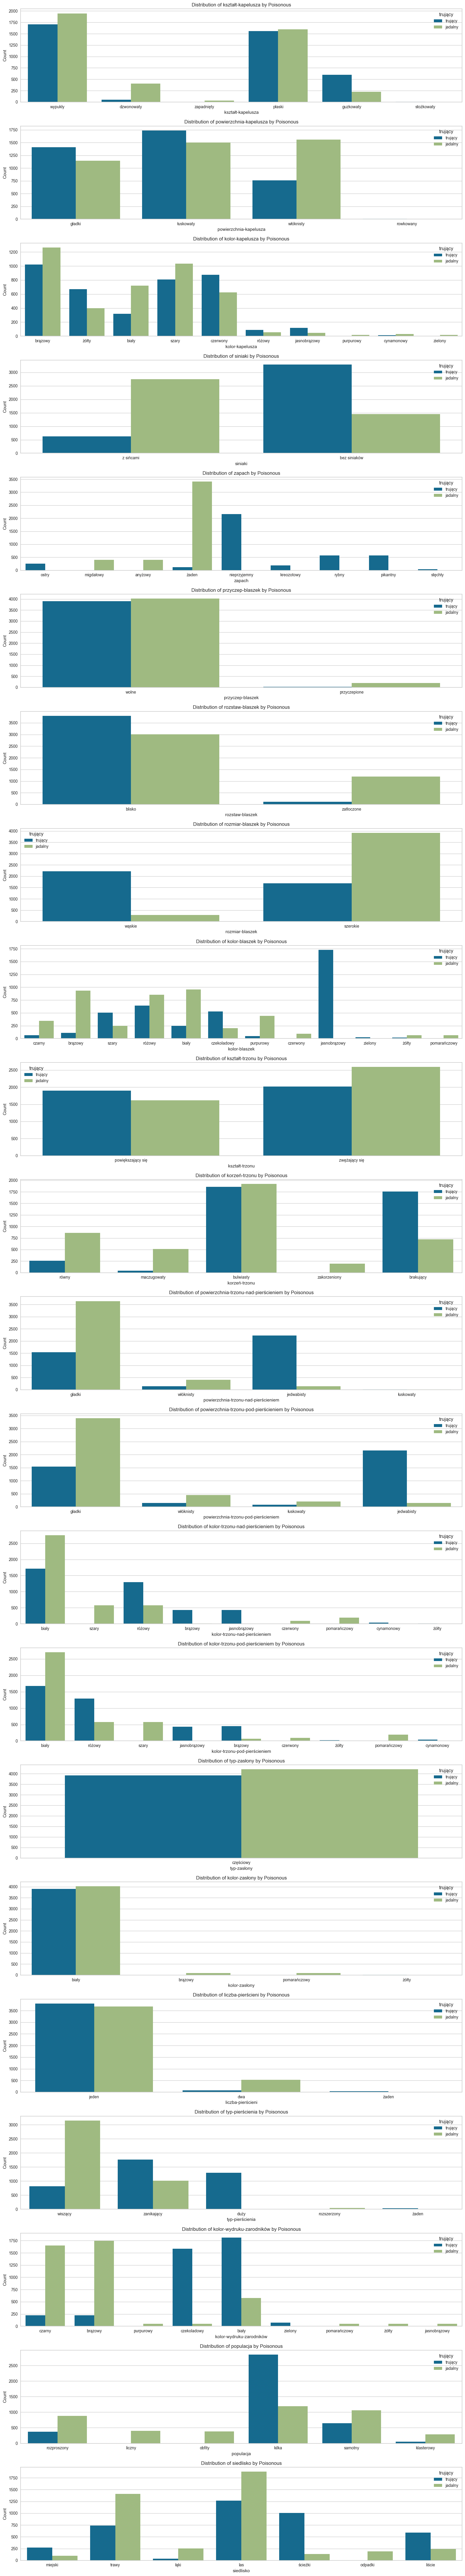

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tworzenie wykresów dla każdej cechy
features = dt.columns[1:]  # Pomijamy kolumnę 'poisonous'

# Ustawienia rozmiaru dla subplotów
plt.figure(figsize=(16, 4 * len(features)))

# Tworzenie wykresów słupkowych dla każdej cechy
for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    #sns.countplot(data=dt, x=feature, hue='poisonous')
    sns.countplot(data=dt, x=feature, hue='trujący')
    plt.title(f'Distribution of {feature} by Poisonous')
    plt.xlabel(feature)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [12]:
# Konwersja wszystkich cech na zmienne binarne z obsługą braków danych
dt_dummies = pd.get_dummies(dt, columns=dt.columns[1:], dummy_na=True)

# Wyświetlenie pierwszych wierszy przekształconej ramki danych
print(dt_dummies.head())

   trujący  kształt-kapelusza_dzwonowaty  kształt-kapelusza_guzkowaty  \
0  trujący                         False                        False   
1  jadalny                         False                        False   
2  jadalny                          True                        False   
3  trujący                         False                        False   
4  jadalny                         False                        False   

   kształt-kapelusza_płaski  kształt-kapelusza_stożkowaty  \
0                     False                         False   
1                     False                         False   
2                     False                         False   
3                     False                         False   
4                     False                         False   

   kształt-kapelusza_wypukły  kształt-kapelusza_zapadnięty  \
0                       True                         False   
1                       True                         False   
2       

In [13]:
dt_dummies

,trujący,kształt-kapelusza_dzwonowaty,kształt-kapelusza_guzkowaty,kształt-kapelusza_płaski,kształt-kapelusza_stożkowaty,kształt-kapelusza_wypukły,kształt-kapelusza_zapadnięty,kształt-kapelusza_nan,powierzchnia-kapelusza_gładki,powierzchnia-kapelusza_rowkowany,...,populacja_samotny,populacja_nan,siedlisko_las,siedlisko_liście,siedlisko_miejski,siedlisko_odpadki,siedlisko_trawy,siedlisko_łąki,siedlisko_ścieżki,siedlisko_nan
0,trujący,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
1,jadalny,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2,jadalny,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,trujący,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,jadalny,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,jadalny,False,True,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
8120,jadalny,False,False,False,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
8121,jadalny,False,False,True,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
8122,trujący,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [14]:
models_to_compare = [
   'catboost',  # CatBoost Classifier (lub 'cat')
   'lr',       #Logistic Regression
    'knn',     #K Neighbors Classifier
    'nb',      #Naive Bayes
    'dt',      #Decision Tree Classifier
    'svm',     #SVM - Linear Kernel
    'rbfsvm',  #SVM - Radial Kernel
    #'gpc',     #Gaussian Process Classifier
    'mlp',     #MLP Classifier
    'ridge',   #Ridge Classifier
    'rf',      #Random Forest Classifier
    'qda',     #Quadratic Discriminant Analysis
    'ada',     #Ada Boost Classifier
    'gbc',     #Gradient Boosting Classifier
    'lda',     #Linear Discriminant Analysis
    'et',      #Extra Trees Classifier
    'xgboost', #Extreme Gradient Boosting
    'lightgbm',#Light Gradient Boosting Machine
    'dummy'    #Dummy Classifier
]


In [15]:
from pycaret.classification import *

# Konfiguracja PyCaret z 'poisonous' jako zmienną docelową
clf = setup(
    data=dt_dummies
    , target='trujący'
    #, target='poisonous'
    , session_id=123)


,Description,Value
0,Session id,123
1,Target,trujący
2,Target type,Binary
3,Target mapping,"jadalny: 0, trujący: 1"
4,Original data shape,"(8124, 140)"
5,Transformed data shape,"(8124, 140)"
6,Transformed train set shape,"(5686, 140)"
7,Transformed test set shape,"(2438, 140)"
8,Preprocess,True
9,Imputation type,simple


In [16]:
best_model = compare_models(models_to_compare, sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2610
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3140
mlp,MLP Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.1380
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3600
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3390
qda,Quadratic Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1250
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3450
dt,Decision Tree Classifier,0.9998,0.9998,0.9998,0.9998,0.9998,0.9996,0.9996,0.0830
ada,Ada Boost Classifier,0.9998,1.0000,0.9998,0.9998,0.9998,0.9996,0.9996,0.3910
svm,SVM - Linear Kernel,0.9998,1.0000,0.9998,0.9998,0.9998,0.9996,0.9996,0.1000


In [17]:
# Tworzenie modelu KNN
dt_model = create_model('dt')

# Strojenie modelu KNN
tuned_dt_model = tune_model(dt_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9965,1.0000,0.9965,0.9965,0.9965,0.9930,0.9930
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9982,1.0000,0.9982,0.9982,0.9982,0.9965,0.9965
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9982,1.0000,0.9982,0.9982,0.9982,0.9965,0.9965
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


  0%|          | 0/100 [00:00<?, ?it/s]

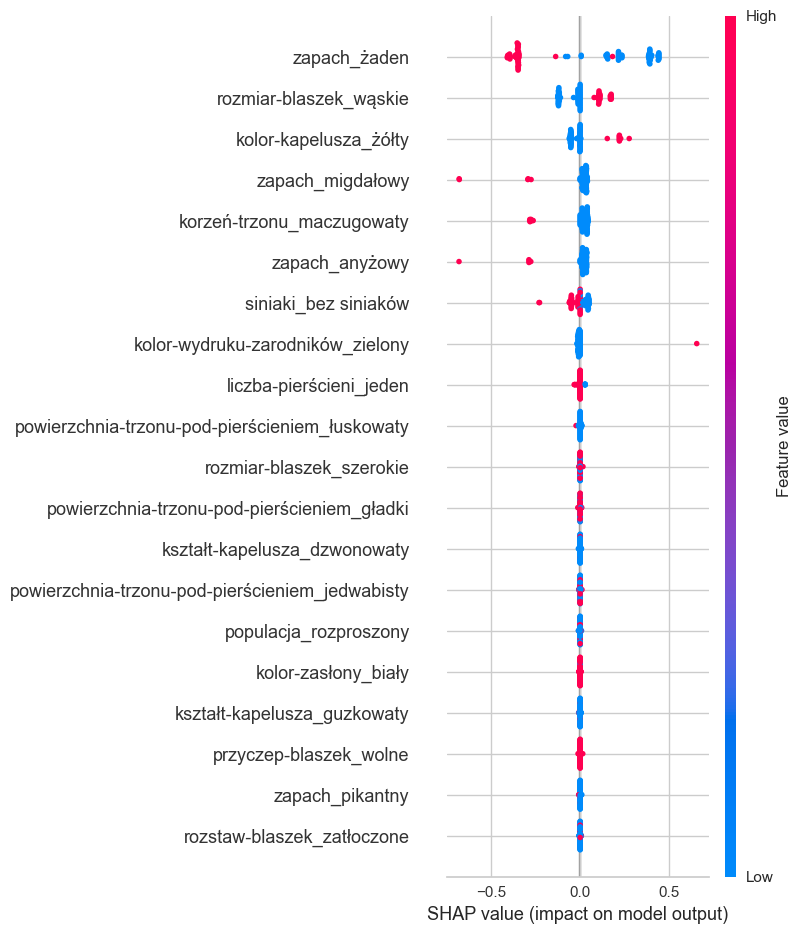

In [18]:
import shap

# Tworzenie explainer dla modelu KNN
explainer = shap.KernelExplainer(dt_model.predict, dt_dummies.drop(columns=['trujący']).sample(100, random_state=123))
shap_values = explainer.shap_values(dt_dummies.drop(columns=['trujący']).sample(100, random_state=123))

# Generowanie wykresu SHAP summary plot
shap.summary_plot(shap_values, dt_dummies.drop(columns=['trujący']).sample(100, random_state=123))

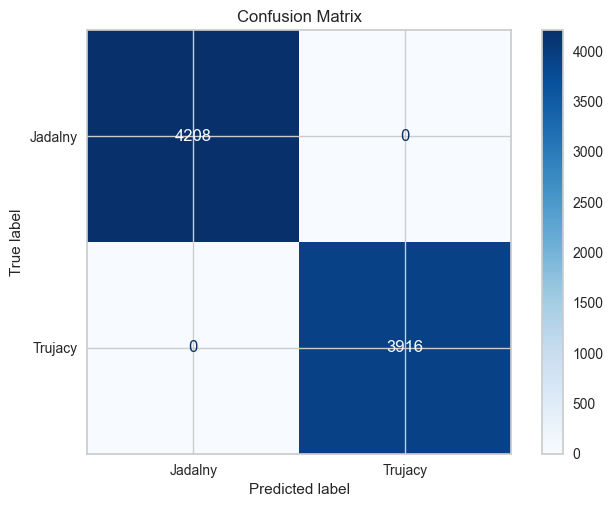

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Zakodowanie zmiennej 'trujący' jako 0 i 1
y_true = dt_dummies['trujący'].map({'jadalny': 0, 'trujący': 1})

# Przewidywanie klasy dla danych
y_pred = dt_model.predict(dt_dummies.drop(columns=['trujący']))

# Obliczenie macierzy konfuzji
cm = confusion_matrix(y_true, y_pred)

# Rysowanie macierzy konfuzji
ConfusionMatrixDisplay(cm, display_labels=['Jadalny', 'Trujacy']).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
